In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
def estimate_maxima(data):

    kde = gaussian_kde(data)

    samples = np.arange(min(data), max(data), 1e-9)

    probs = kde.evaluate(samples)
    maxima_index = probs.argmax()

    maxima = samples[maxima_index]

    return maxima

In [3]:
listdir()

['.ipynb_checkpoints',
 '3alpha.pdf',
 'blue-10_-10.csv',
 'blue-10_-15.csv',
 'blue-10_-20.csv',
 'blue-10_-25.csv',
 'blue-10_-30.csv',
 'blue-10_-5.csv',
 'blue-10_0.csv',
 'blue-10_10.csv',
 'blue-10_11.csv',
 'blue-10_12.csv',
 'blue-10_13.csv',
 'blue-10_14.csv',
 'blue-10_15.csv',
 'blue-10_20.csv',
 'blue-10_25.csv',
 'blue-10_30.csv',
 'blue-10_5.csv',
 'blue-10_6.csv',
 'blue-10_7.csv',
 'blue-10_8.csv',
 'blue-10_9.csv',
 'blue-10_signal.png',
 'blue10_-25.csv',
 'blue10_-30.csv',
 'blue_-10.csv',
 'blue_-2.csv',
 'blue_-20.csv',
 'blue_-30.csv',
 'blue_-4.csv',
 'blue_-6.csv',
 'blue_-8.csv',
 'blue_0.csv',
 'blue_10.csv',
 'blue_2.csv',
 'blue_20.csv',
 'blue_30.csv',
 'blue_4.csv',
 'blue_6.csv',
 'blue_8.csv',
 'blue_signal.png',
 'blue_signal_normalized.png',
 'both_-10.csv',
 'both_-2.csv',
 'both_-20.csv',
 'both_-30.csv',
 'both_-4.csv',
 'both_-6.csv',
 'both_-8.csv',
 'both_0.csv',
 'both_10.csv',
 'both_2.csv',
 'both_20.csv',
 'both_30.csv',
 'both_4.csv',
 'both

In [4]:
# W = {}
    
# for prefix in angles.keys():
#     for angle in angles[prefix]:
#         name = '_'.join([prefix, str(angle)])+'.csv'
        
#         data = np.loadtxt(name, skiprows=15, delimiter=';',
#                           usecols=(3, 4), dtype='str')
        
#         for i in range(len(data)):
#             for device in range(2):
#                 if data[i, device]==' No device found' or data[i, device]=='в€ћ' or data[i,device]== 'NaN':
#                     data[i,device] = 0
#                 else:
#                     data[i,device] = data[i,device].replace(',', '.')
                    
        
#         data = data.astype(np.float64)
        
#         #sns.displot(data, label=name, kde=True)
        
#         value = np.average(value_small/value_big)
        
#         if prefix not in W.keys():
#             W[prefix] = [value]
#         else:
#             W[prefix].append(value)
        
#     W[prefix] = np.array(W[prefix])

In [5]:
%matplotlib notebook
angles = {}
W_big = {}
W_small = {}
W_big = {}
for name in listdir():
    if name[-4:] == '.csv':
        prefix, angle  = name[:-4].split('_')
        if prefix not in angles.keys():
            angles[prefix] = [int(angle)]
        else:
            angles[prefix].append(int(angle))
for prefix in angles.keys():
    angles[prefix] = sorted(angles[prefix])
    
for prefix in angles.keys():
    for angle in angles[prefix]:
        name = '_'.join([prefix, str(angle)])+'.csv'
        
        data = np.loadtxt(name, skiprows=15, delimiter=';',
                          usecols=(3, 4), dtype='str')
        
        for i in range(len(data)):
            for device in range(2):
                if data[i, device]==' No device found' or data[i, device]=='в€ћ' or data[i,device]== 'NaN':
                    data[i,device] = 0
                else:
                    data[i,device] = data[i,device].replace(',', '.')
                    
        
        data = np.array(data.astype(np.float64))
        
        #sns.displot(data, label=name, kde=True)
        
        value_small = estimate_maxima(data[:, 0])
        
        if prefix not in W_small.keys():
            W_small[prefix] = [value_small]
        else:
            W_small[prefix].append(value_small)
        #print(name)
        #print(data[:, 1])
        value_big = estimate_maxima(data[:, 1])
    
        if prefix not in W_big.keys():
            W_big[prefix] = [value_big]
        else:
            W_big[prefix].append(value_big)
    W_small[prefix] = np.array(W_small[prefix])
    W_big[prefix] = np.array(W_big[prefix])

In [6]:
from scipy.optimize import curve_fit

def g(U, d_U, alpha, d_I):
    return ((U-d_U)/(2*alpha))**2+d_I


<IPython.core.display.Javascript object>


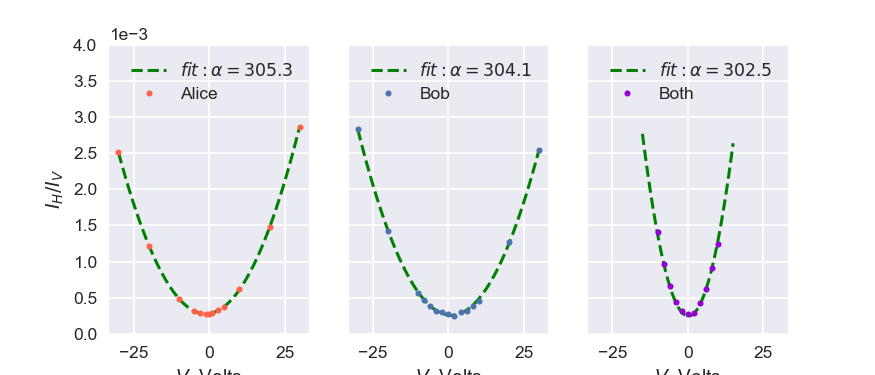

In [11]:
%matplotlib notebook
plt.style.use('seaborn')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 3), sharey=True)

crystal = 'red'
popt, pcov = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))

addit = np.linspace(angles[crystal][0], angles[crystal][-1], 100)
ax1.plot(addit, g(addit, *popt), 'g--', label=r'$fit: \alpha=%5.1f $' % popt[1])
ax1.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='Alice', color='tomato')

ax1.grid(True)
ax1.set_ylim([0,0.004])
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax1.legend()
ax1.set_ylabel(r'$I_H/I_V$')
ax1.set_xlabel(r'$V$, Volts')

crystal = 'blue'
popt, pcov = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))
addit = np.linspace(angles[crystal][0], angles[crystal][-1], 100)
ax2.plot(addit, g(addit, *popt), 'g--', label=r'$fit: \alpha=%5.1f $' % popt[1])
ax2.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='Bob')
ax2.legend()
ax2.grid(True)
ax2.set_xlabel(r'$V$, Volts')


crystal = 'both'
popt, pcov = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))

addit = np.linspace(-15, 15, 100)

ax3.plot(addit, g(addit, *popt), 'g--', label=r'$fit: \alpha=%5.1f $' % (popt[1]*2))
ax3.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='Both', color = 'darkviolet')

ax3.legend()
ax3.set_xlabel(r'$V$, Volts')

plt.savefig('3alpha.pdf', bbox_inches='tight' )

<IPython.core.display.Javascript object>


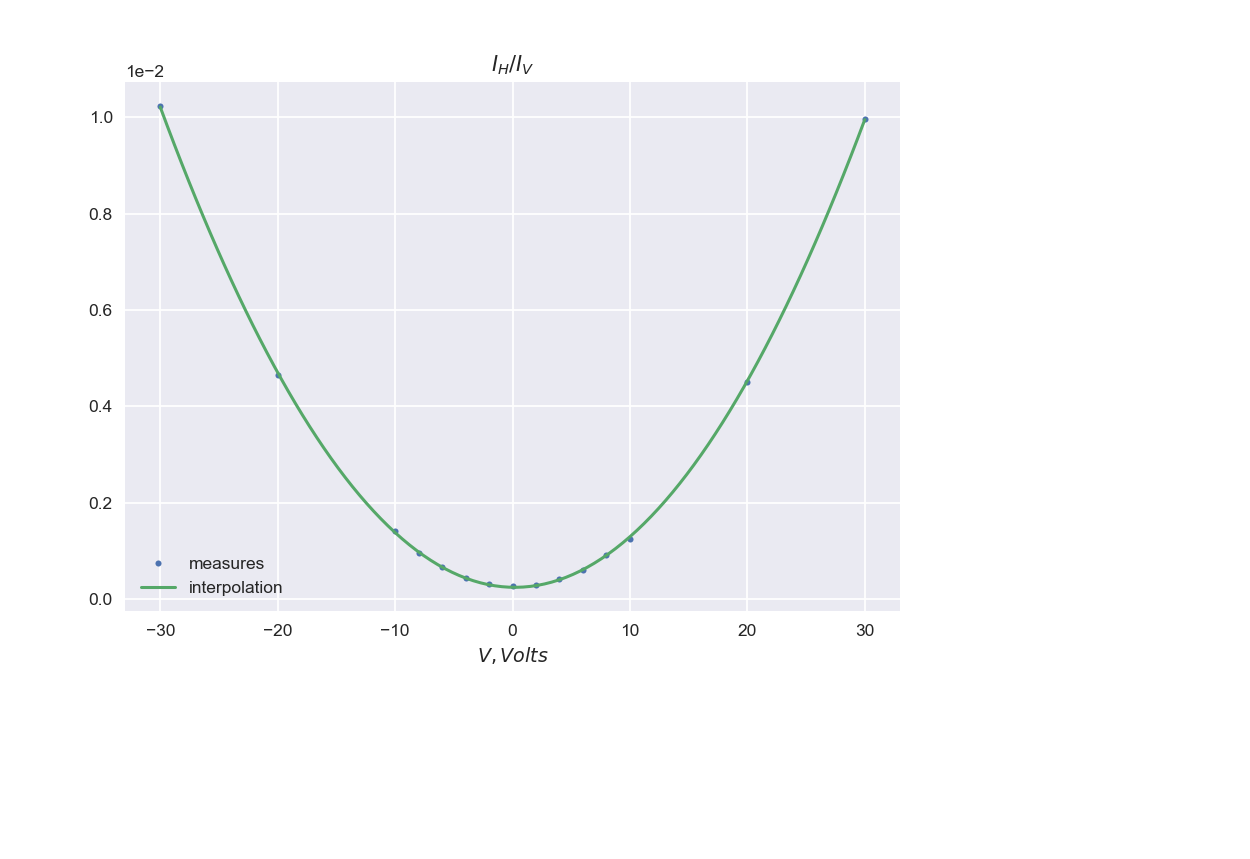

In [16]:
%matplotlib notebook

crystal = 'both'
both = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))[0]

plt.title(r'$I_H/I_V$')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles[crystal]), np.max(angles[crystal]), 100)
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='measures')
plt.plot(V_int, g(V_int, *both), label='interpolation')
plt.grid(True)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.savefig('both_signal')

<IPython.core.display.Javascript object>


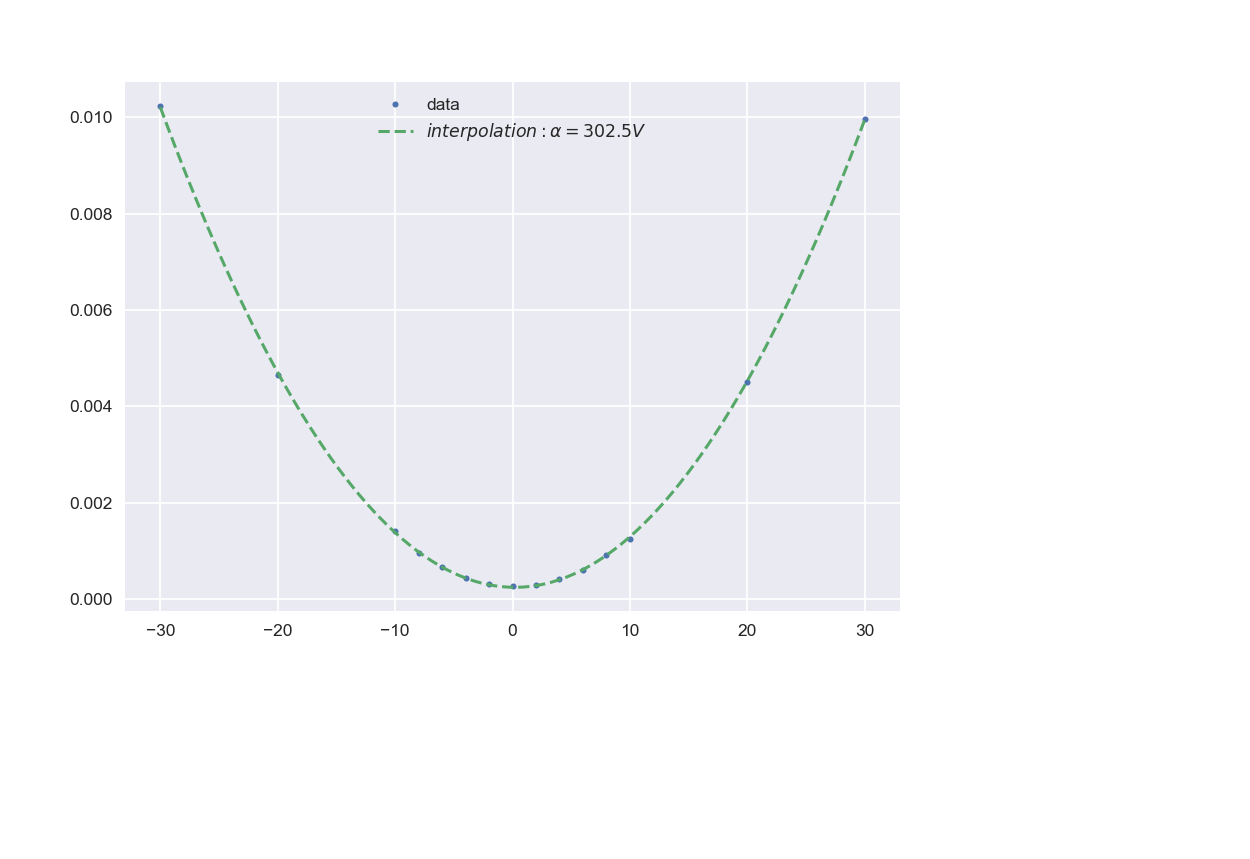

In [8]:
%matplotlib notebook
crystal = 'both'
plt.title('')
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal]),'.', label='data')
popt, pcov = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))
plt.plot(np.linspace(-30,30,100), g(np.linspace(-30,30,100), *popt), '--', label=r'$interpolation: \alpha=%5.1f V$' % (popt[1]*2))
plt.legend()
plt.grid(True)

# Red

-1.125399161320941 305.2879999059815 0.0002762821847453332


<IPython.core.display.Javascript object>


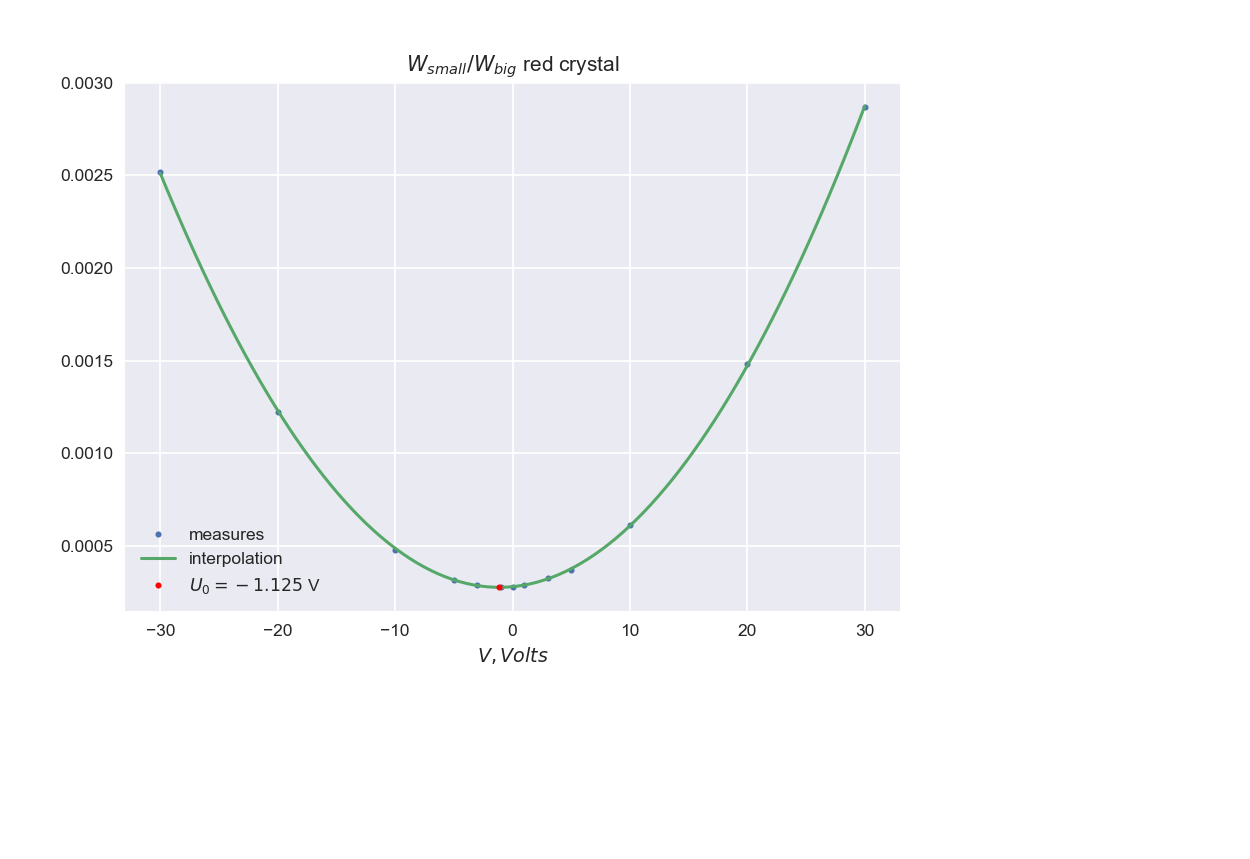

In [14]:
%matplotlib notebook
crystal = 'red'
d_U_red, alpha_red, d_I_red = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))[0]
print(d_U_red, alpha_red, d_I_red)
plt.title(r'$W_{small}/W_{big}$ red crystal')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles[crystal]), np.max(angles[crystal]), 100)
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='measures')
plt.plot(V_int, g(V_int, d_U_red, alpha_red, d_I_red), label='interpolation')
plt.plot(d_U_red, d_I_red, '.', color='red', label=r'$U_0={0:4.3f}$ V'.format(d_U_red))
plt.grid(True)
plt.legend()
plt.savefig('red_signal')

<IPython.core.display.Javascript object>


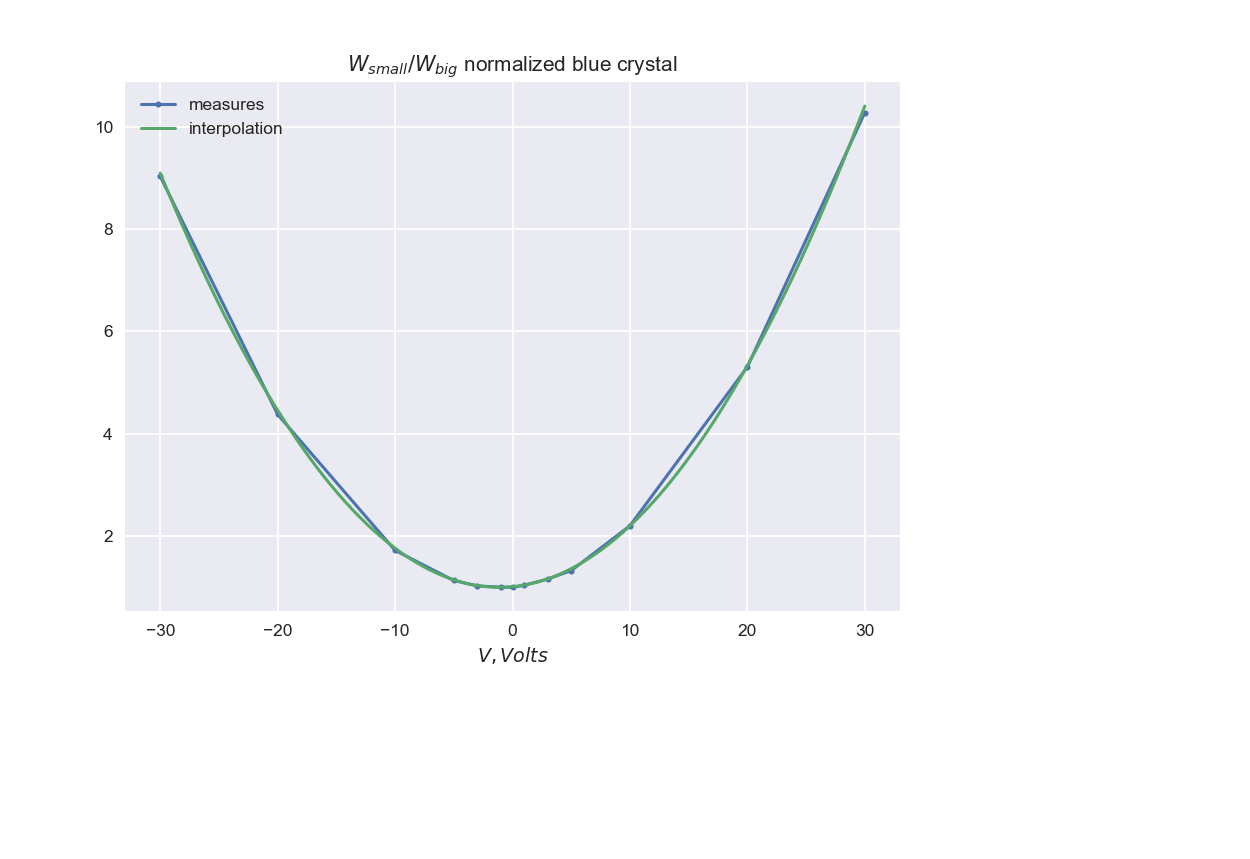

In [16]:
%matplotlib notebook
crystal = 'red'
plt.title(r'$W_{small}/W_{big}$ normalized blue crystal')
plt.xlabel(r'$V, Volts$')
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal])/np.min(W_small[crystal]/W_big[crystal]), '.-', label='measures')
plt.plot(V_int, g(V_int, d_U_red, alpha_red, d_I_red)/np.min(g(angles[crystal], d_U_red, alpha_red, d_I_red)), label='interpolation')
plt.grid(True)
plt.legend()
plt.savefig('red_signal_normalized')

# Blue

0.8605481349394697 304.1144175483239 0.00025619109570818954


<IPython.core.display.Javascript object>


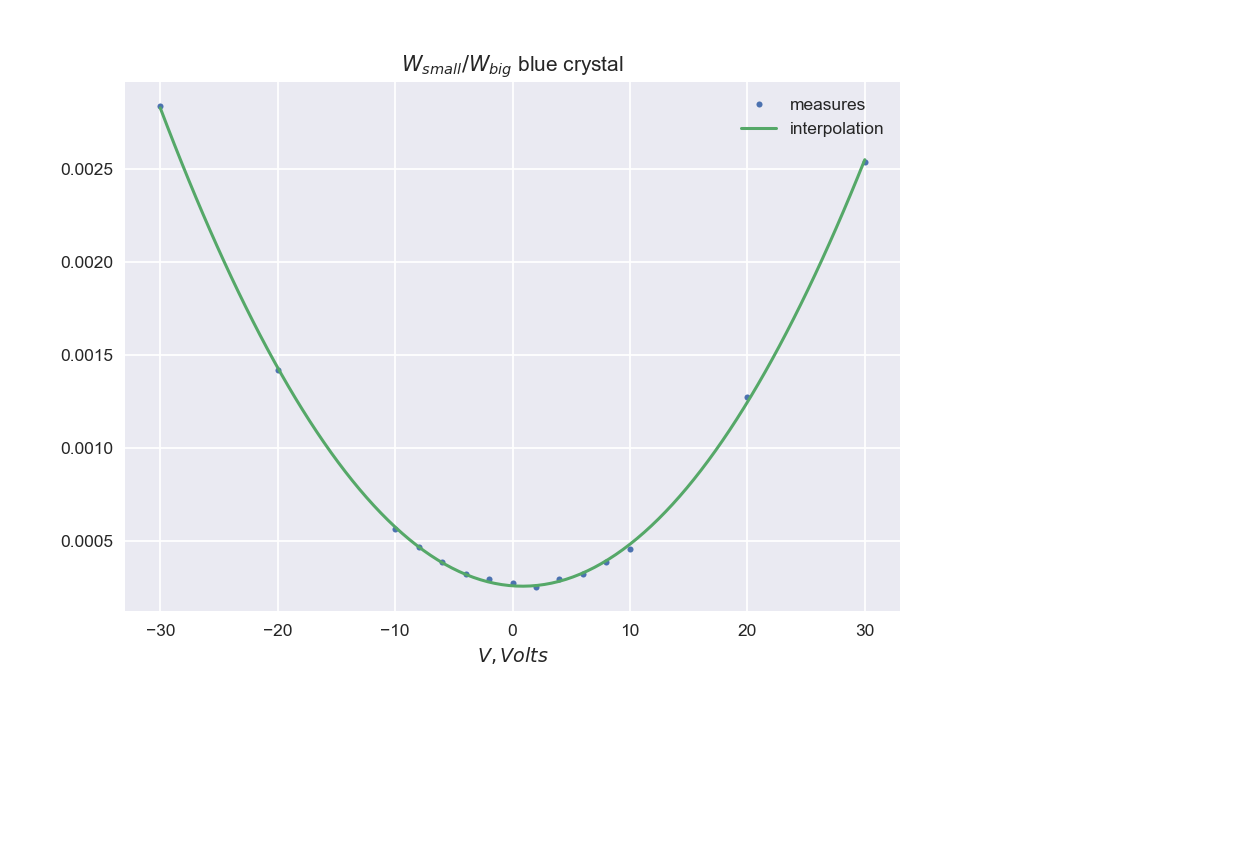

In [19]:
%matplotlib notebook
crystal = 'blue'
d_U_blue, alpha_blue, d_I_blue = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))[0]
print(d_U_blue, alpha_blue, d_I_blue)
plt.title(r'$W_{small}/W_{big}$ blue crystal')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles[crystal]), np.max(angles[crystal]), 100)
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='measures')
plt.plot(V_int, g(V_int, d_U_blue, alpha_blue, d_I_blue), label='interpolation')
plt.grid(True)
plt.legend()
plt.savefig('blue_signal')

<IPython.core.display.Javascript object>


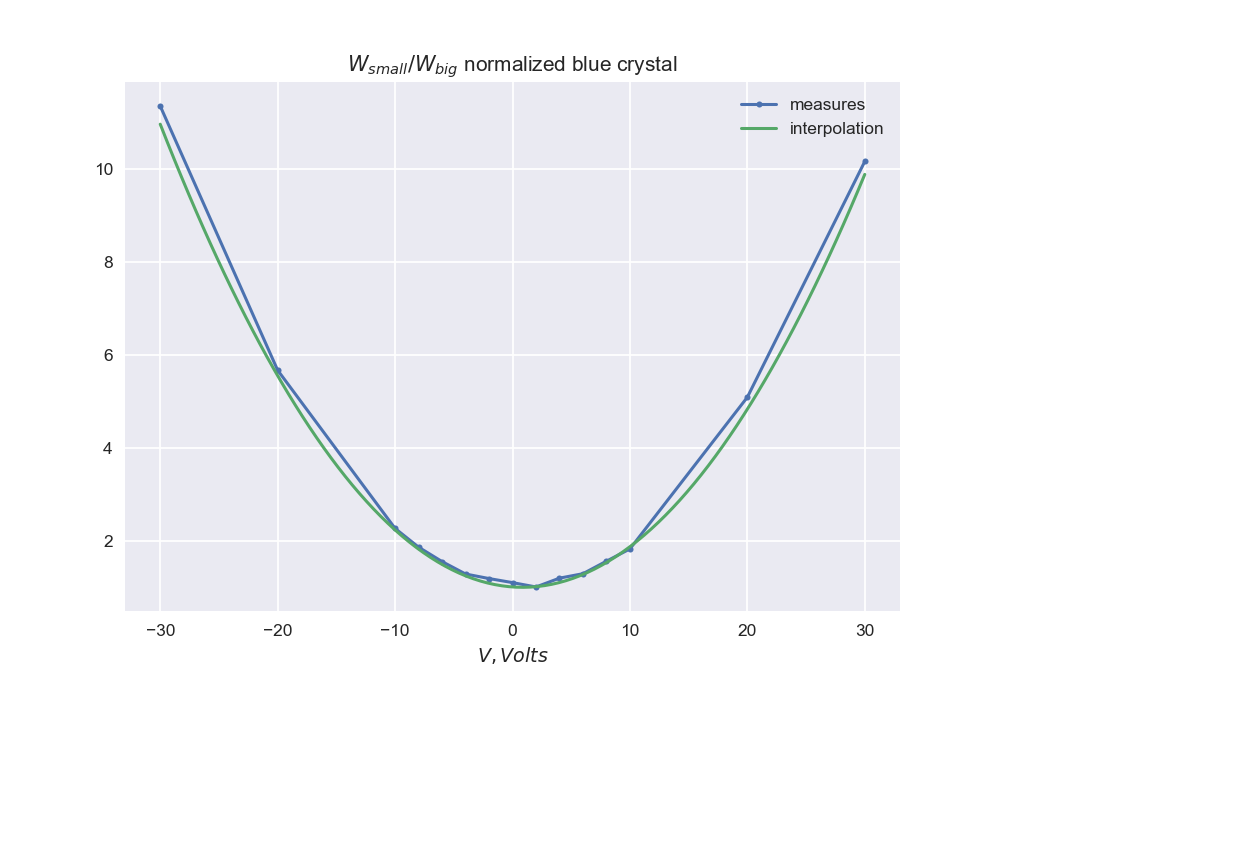

In [20]:
%matplotlib notebook
crystal = 'blue'
plt.title(r'$W_{small}/W_{big}$ normalized blue crystal')
plt.xlabel(r'$V, Volts$')
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal])/np.min(W_small[crystal]/W_big[crystal]), '.-', label='measures')
plt.plot(V_int, g(V_int, d_U_blue, alpha_blue, d_I_blue)/np.min(g(angles[crystal], d_U_blue, alpha_blue, d_I_blue)), label='interpolation')
plt.grid(True)
plt.legend()
plt.savefig('red_signal_normalized')

# Both

<IPython.core.display.Javascript object>


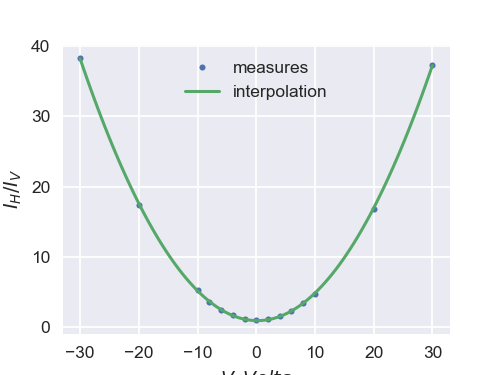

In [226]:
%matplotlib notebook
crystal = 'both'
plt.figure(figsize=(4,3))
plt.xlabel(r'$V, Volts$')
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal])/np.min(W_small[crystal]/W_big[crystal]), '.', label='measures')
plt.plot(V_int, g(V_int, *both)/np.min(W_small[crystal]/W_big[crystal]), label='interpolation')
#plt.plot(both[0], both[-1]/np.min(W_small[crystal]/W_big[crystal]), '.', label=r'$U_0={0:4.3f}$ V'.format(both[0]))
plt.grid(True)
plt.legend()
plt.ylabel(r'$I_{H}/I_{V}$')
plt.savefig('both_signal_normalized.pdf', bbox_inches='tight')

# Red 2V

In [ ]:
%matplotlib notebook
crystal = 'red2'
d_U, alpha, d_I = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))[0]
print(d_U, alpha, d_I)
plt.title(r'$W_{small}/W_{big}$ red2 crystal')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles[crystal]), np.max(angles[crystal]), 100)
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='measures')
plt.plot(V_int, g(V_int, d_U, alpha, d_I), label='interpolation')
plt.plot(d_U, d_I, '.', label=r'$U_0={0:4.3f}$ V'.format(d_U))           
plt.grid()
plt.legend()
plt.savefig('red2_signal')

In [ ]:
print(d_U_blue, d_U_red, d_U_blue-d_U_red)
print('относительный сдвиг кристаллов', d_U_blue-d_U_red)

# Blue -10V

In [ ]:
%matplotlib notebook
crystal = 'blue-10'
d_U, alpha, d_I = curve_fit(g, angles[crystal], (W_small[crystal]/W_big[crystal]))[0]
print(d_U, alpha, d_I)
plt.title(r'$W_{small}/W_{big}$ blue-10 crystal')
plt.xlabel(r'$V, Volts$')
V_int = np.linspace(np.min(angles[crystal]), np.max(angles[crystal]), 100)
#print(np.shape(angles['blue']), np.shape(W_big['blue']), np.shape(W_small['blue']))
plt.plot(angles[crystal], (W_small[crystal]/W_big[crystal]), '.', label='measures')
plt.plot(V_int, g(V_int, d_U, alpha, d_I), label='interpolation')
plt.plot(d_U, d_I, '.', label=r'$U_0={0:4.3f}$ V'.format(d_U))
plt.grid()
plt.legend()
plt.savefig('blue-10_signal')
print(10-d_U)

In [ ]:
W= np.loadtxt('blue_-30.csv', skiprows=15, delimiter=';',
                          usecols=(3, 4), dtype='str')
W_s = W[:, 0]
W_b = W[:, 1]
for i in range(len(W_s)):
    W_s[i] = W_s[i].replace(',', '.')
for i in range(len(W_b)):
    W_b[i] = W_b[i].replace(',', '.')
W_s = W_s.astype(np.float64)
W_b = W_b.astype(np.float64)
plt.plot(np.arange(0, len(W_s)), W_s)


In [ ]:

plt.plot(np.arange(0, len(W_s)), W_s/W_b)
np.average(W_s/W_b)

<IPython.core.display.Javascript object>


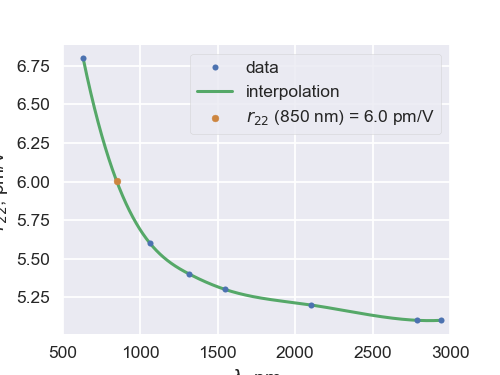

In [225]:
%matplotlib notebook
from scipy.interpolate import splrep, splev
plt.figure(figsize=(4, 3))
r_22 = np.array([[0.633, 6.8], [1.064, 5.6], [1.318, 5.4], [1.55, 5.3], [2.10, 5.2], [2.79, 5.1], [2.94 ,5.1]])
r_22[:, 0] *= 1000

plt.plot(r_22[:, 0], r_22[:, 1], '.', label='data')

l = np.arange(min(r_22[:, 0]), max(r_22[:, 0]))
tck = splrep(r_22[:, 0], r_22[:, 1], s=0)
r_int = splev(l, tck, der=0)
r_850 = splev(850, tck, der=0)

plt.scatter(850, r_850, s=15, color='peru', zorder=2, label=r'$r_{22}$ (850 nm) = 6.0 pm/V')
plt.plot(l, r_int, zorder=1, label='interpolation')

#plt.axhline(y=r_850, xmax=350/2500, linewidth=1, linestyle='--', color='peru')
#plt.axvline(x=850, ymax=1/2, linewidth=1, linestyle='--', color='peru')
#plt.xticks(np.concatenate(([850], np.arange(500, 3300, 500))), rotation=20)
#plt.yticks(np.concatenate((np.round([r_850], 2), np.arange(5,7,0.25))))
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.xlim([500, 3000])
#plt.ylim([5, 7])
plt.legend(frameon=True)
plt.ylabel(r'$r_{22}$, pm/V')
plt.xlabel(r'$\lambda$, nm')
plt.savefig('interp.pdf', bbox_inches='tight')

In [191]:
1.5*np.linspace(0,1,3)

array([0.  , 0.75, 1.5 ])

In [ ]:
3x+1.5y=0
x^2+y^2=0.5
